In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
pd.set_option('display.max_columns', 200)

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  

In [3]:
house = pd.read_csv("Housing.csv")

In [5]:
house.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
house.shape

(545, 13)

In [9]:
house.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
#house.dropna(inplace=True)

In [19]:
house.duplicated().sum()

0

In [21]:
house.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


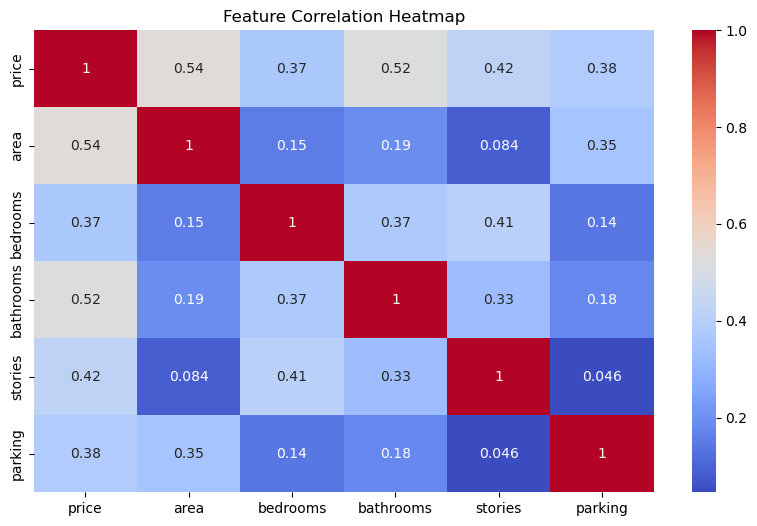

In [27]:
# Define numerical columns
num_cols = house.select_dtypes(include=['int64', 'float64']).columns

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(house[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

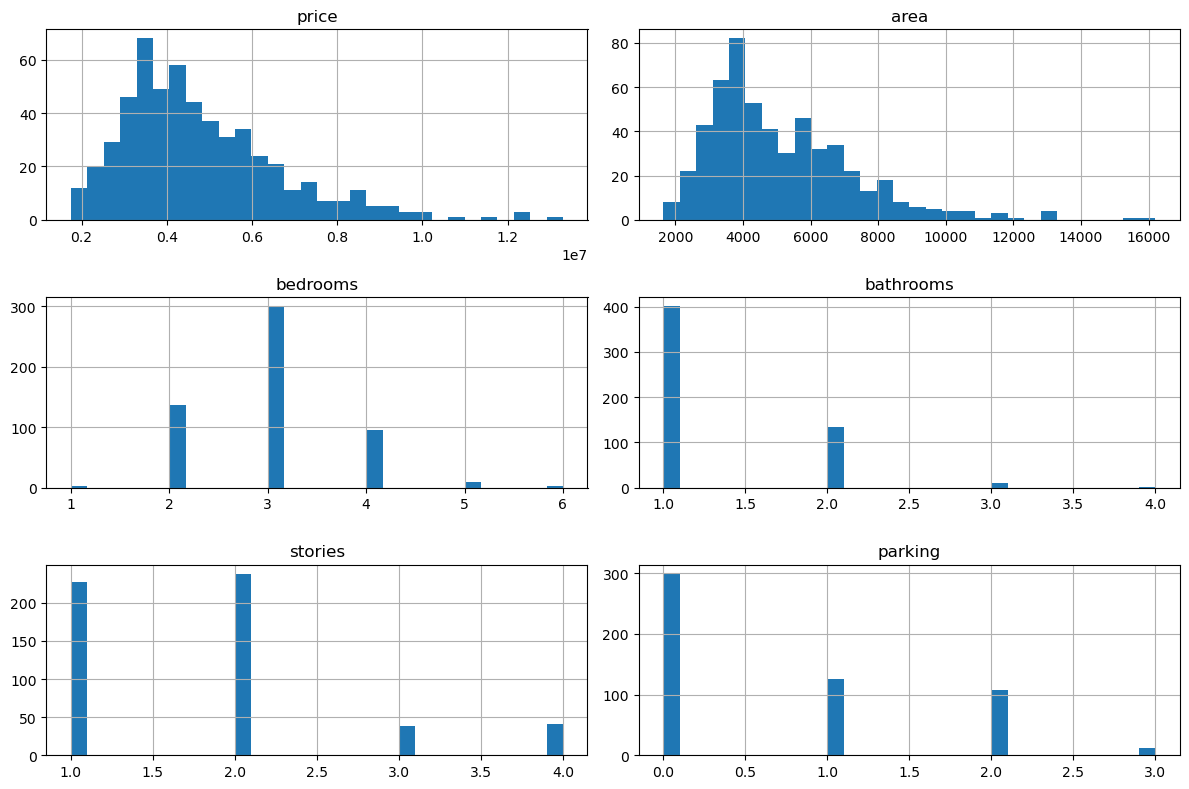

In [29]:
# Histogram of all numerical features
house.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

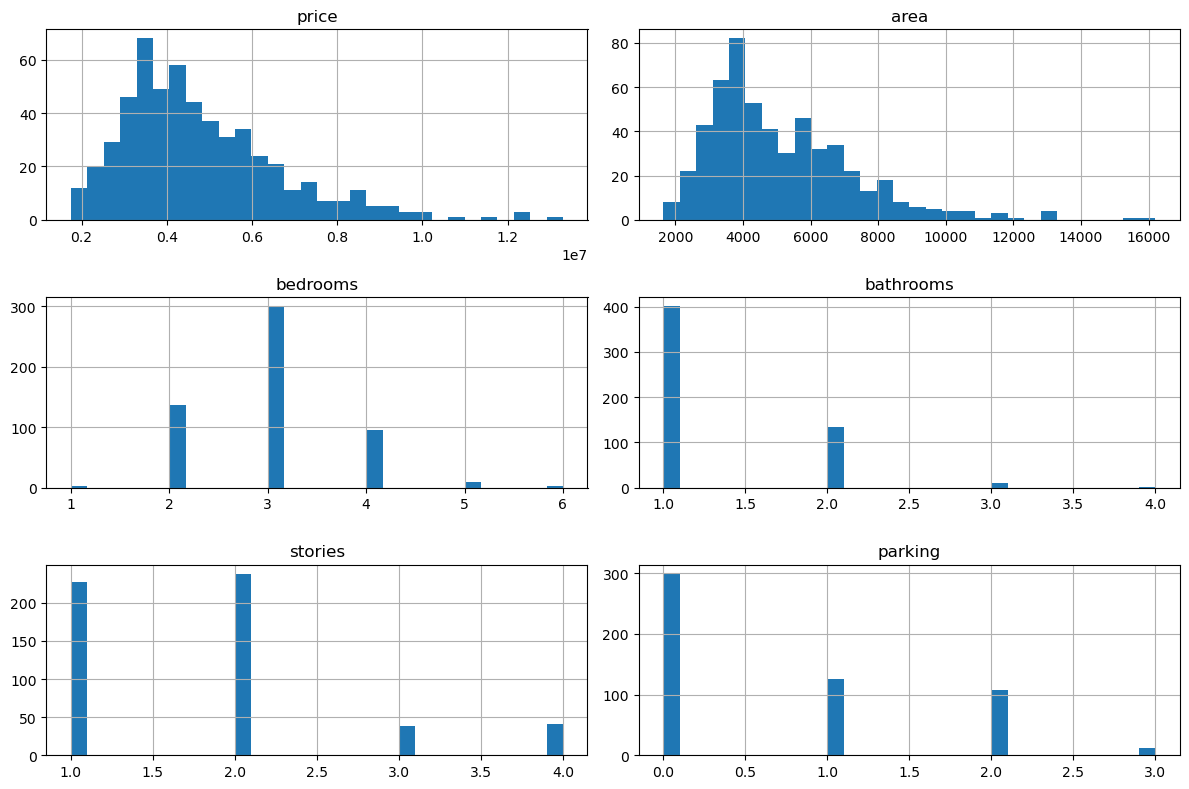

In [29]:
# Histogram of all numerical features
house.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

In [31]:
# Function to plot categorical features
def plot_cat(dataset, feature):
    plt.figure(figsize=(5,3))
    sns.countplot(data=dataset, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

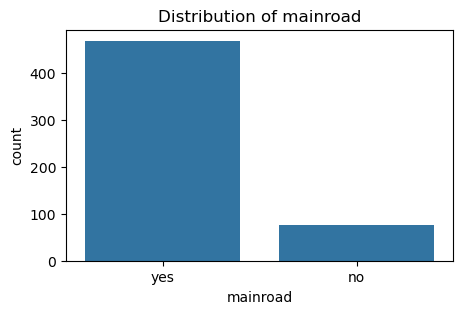

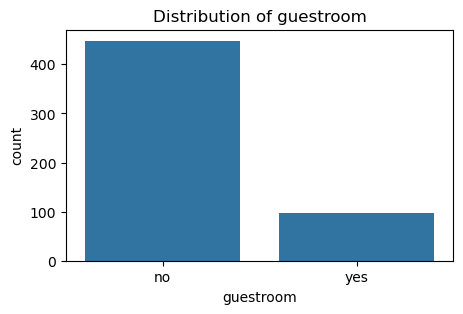

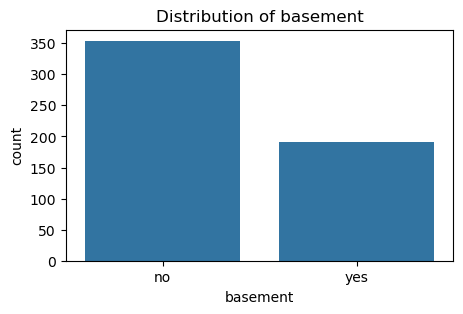

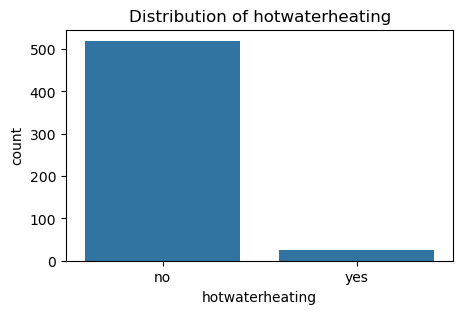

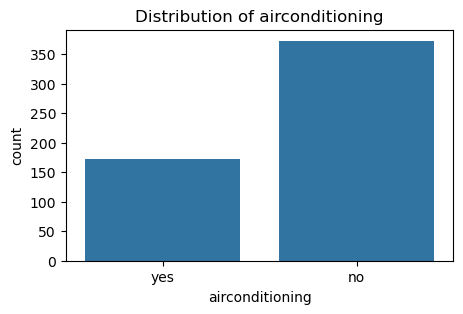

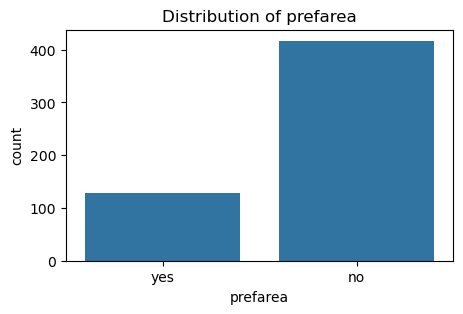

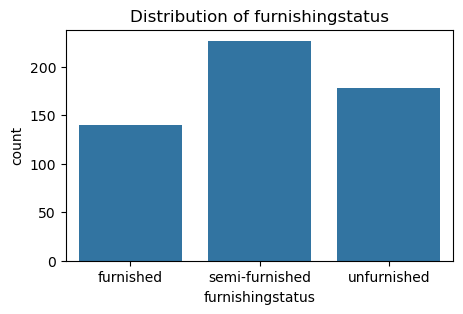

In [33]:
# Categorical feature visualization
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    plot_cat(house, feature)

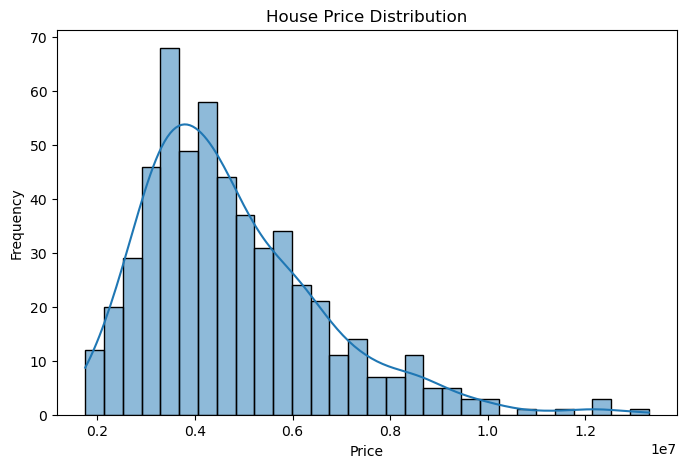

In [35]:
# Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(house['price'], kde=True, bins=30)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

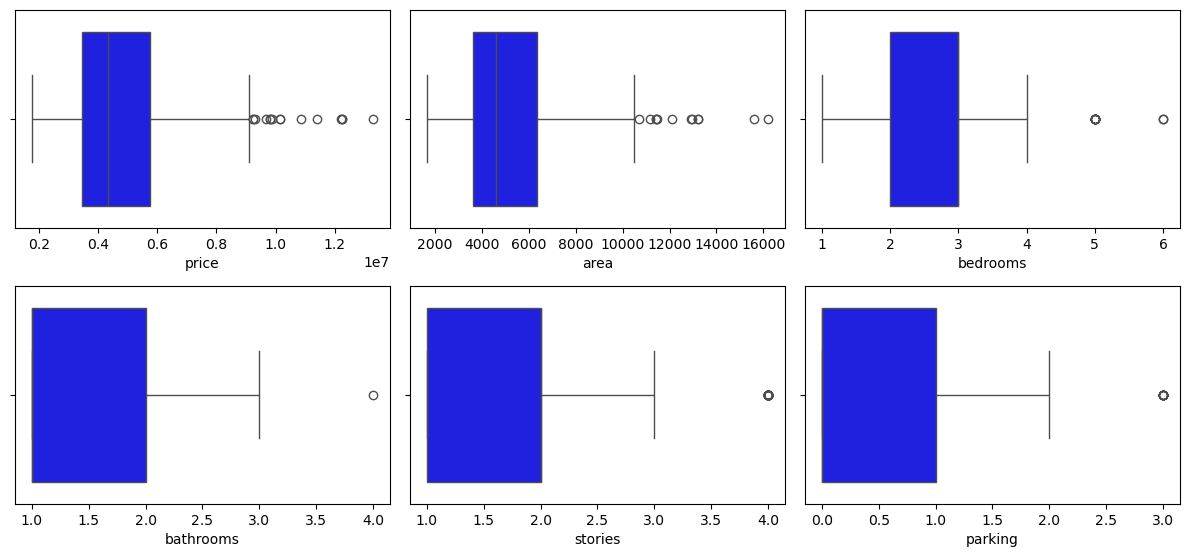

In [37]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=house[col], color='blue')
plt.tight_layout()
plt.show()

In [67]:
# Encoding categorical variables
house_encoded = pd.get_dummies(house, columns=categorical_features, drop_first=True)

# Define features and target variable
X = house_encoded.drop(['price'], axis=1)
y = house_encoded['price']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# Function to evaluate regression models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Root Mean Square Logarithmic Error (RMSLE)
    y_test_log = np.log1p(y_test)  # log(1+y) to prevent log(0)
    y_pred_log = np.log1p(y_pred)
    rmsle = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
    
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"Mean Squared Error (MSE): {mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:,.4f}")
    print("-" * 50)

In [79]:
# Train Decision Tree Model
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=20, random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test)


DecisionTreeRegressor Performance:
R² Score: 0.4407
Mean Absolute Error (MAE): 1,266,850.77
Mean Squared Error (MSE): 2,827,203,689,429.38
Root Mean Squared Error (RMSE): 1,681,429.06
Root Mean Squared Logarithmic Error (RMSLE): 0.3253
--------------------------------------------------


In [81]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42, criterion='squared_error')
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

RandomForestRegressor Performance:
R² Score: 0.5872
Mean Absolute Error (MAE): 1,049,124.62
Mean Squared Error (MSE): 2,086,283,679,357.32
Root Mean Squared Error (RMSE): 1,444,397.34
Root Mean Squared Logarithmic Error (RMSLE): 0.2726
--------------------------------------------------


In [83]:
# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  # Using scaled data for better performance
evaluate_model(lr, X_test_scaled, y_test)

LinearRegression Performance:
R² Score: 0.6529
Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.67
Root Mean Squared Error (RMSE): 1,324,506.96
Root Mean Squared Logarithmic Error (RMSLE): 0.2550
--------------------------------------------------


In [85]:
# Predicting price for a new house
new_house = {
    'area': 2500, 'bedrooms': 3, 'bathrooms': 2, 'stories': 2, 'parking': 1,
    'mainroad_yes': 1, 'guestroom_yes': 0, 'basement_yes': 0, 'hotwaterheating_yes': 0,
    'airconditioning_yes': 1, 'prefarea_yes': 1, 'furnishingstatus_semi-furnished': 1, 'furnishingstatus_unfurnished': 0
}

# Convert dictionary to DataFrame
new_house_df = pd.DataFrame([new_house])

# Ensure column order and missing features are handled
new_house_df = new_house_df.reindex(columns=X_train.columns, fill_value=0)

# Make prediction using the best model
best_model = rf  # Choose Random Forest as the most accurate model
predicted_price = best_model.predict(new_house_df)

print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $5,096,435.85


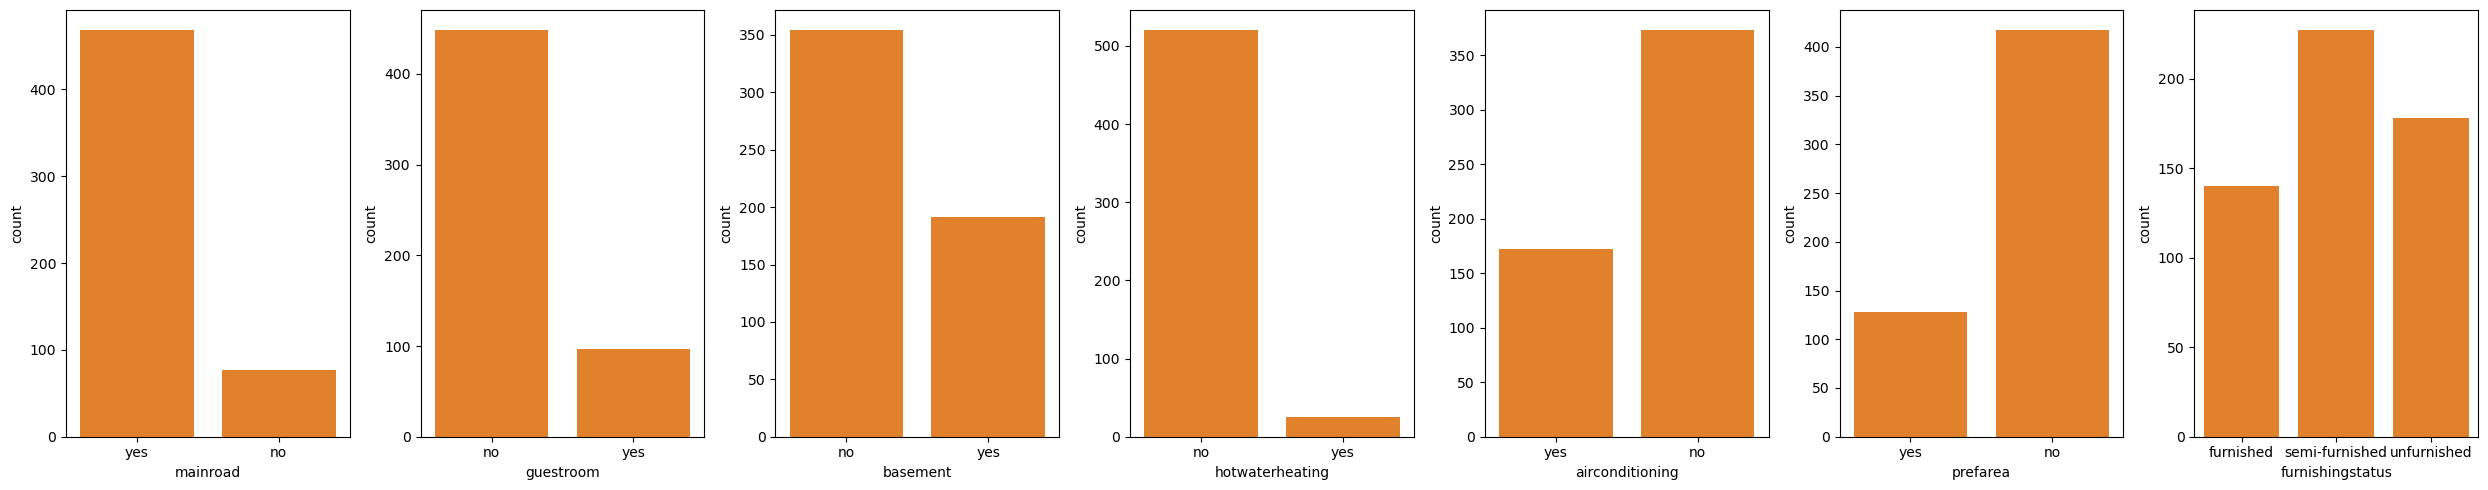

In [36]:
import seaborn as sb
def plot_cat(dataset, feature):
    sb.countplot(data = dataset, x = feature)
    ax = sb.countplot(data = dataset, x = feature)

plt.figure(figsize = (25,5))

plt.subplot(1,7,1)
plot_cat(house, 'mainroad')

plt.subplot(1,7,2)
plot_cat(house, 'guestroom')
plt.subplot(1,7,3)
plot_cat(house, 'basement')

plt.subplot(1,7,4)
plot_cat(house, 'hotwaterheating')

plt.subplot(1,7,5)
plot_cat(house, 'airconditioning')

plt.subplot(1,7,6)
plot_cat(house, 'prefarea')

plt.subplot(1,7,7)
plot_cat(house, 'furnishingstatus')


plt.tight_layout()
plt.show()

In [37]:
house.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

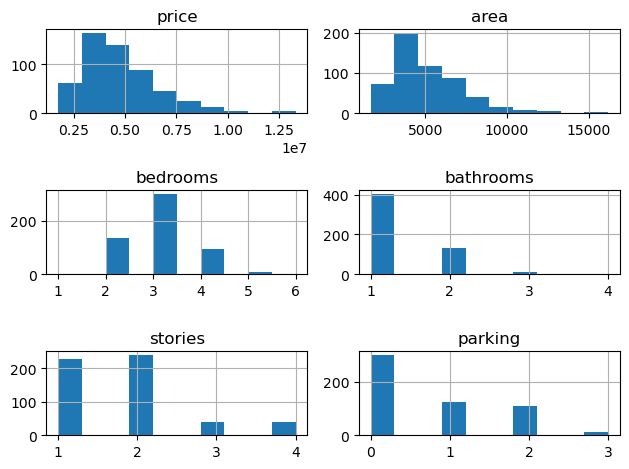

In [38]:
import matplotlib.pyplot as plt
import matplotlib
house.hist()
plt.tight_layout()
plt.show()

In [39]:
# Predicting price for a new house
new_house = {
    'area': 2500, 'bedrooms': 3, 'bathrooms': 2, 'stories': 2, 'parking': 1,
    'mainroad_yes': 1, 'guestroom_yes': 0, 'basement_yes': 0, 'hotwaterheating_yes': 0,
    'airconditioning_yes': 1, 'prefarea_yes': 1, 'furnishingstatus_semi-furnished': 1, 'furnishingstatus_unfurnished': 0
}

# Convert dictionary to DataFrame
new_house_df = pd.DataFrame([new_house]) 

# Ensure column order and missing features are handled
new_house_df = new_house_df.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
predicted_price = dt.predict(new_house_df)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $3,904,600.00
